# <center>SALES PREDICTION USING PYTHON

<img src="OIP.jpeg"/>

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

In [66]:
ad=pd.read_csv("Advertising.csv")

In [67]:
ad

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [68]:
ad=ad.drop(['Unnamed: 0'],axis=1)

In [69]:
ad

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [70]:
ad.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [71]:
ad.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [72]:
ad.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


<AxesSubplot:>

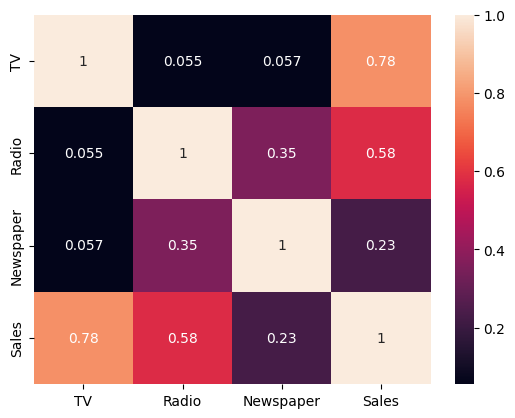

In [73]:
sns.heatmap(ad.corr(),annot=True)

<AxesSubplot:xlabel='Sales', ylabel='TV'>

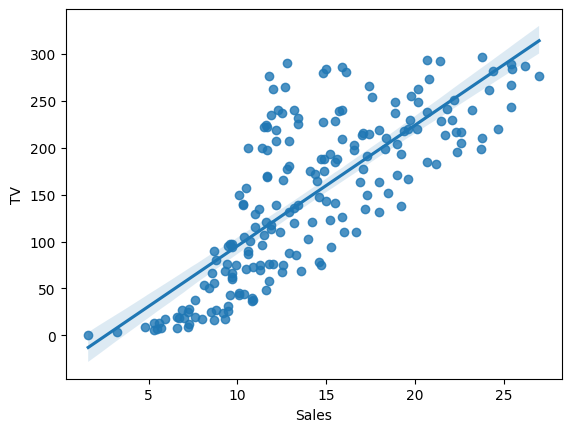

In [74]:
sns.regplot(data=ad,x="Sales",y="TV")

<AxesSubplot:xlabel='Sales', ylabel='Newspaper'>

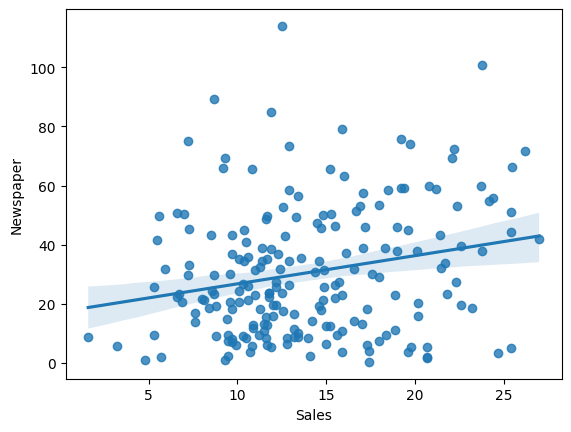

In [75]:
sns.regplot(data=ad,x="Sales",y="Newspaper")

<AxesSubplot:xlabel='Sales', ylabel='Radio'>

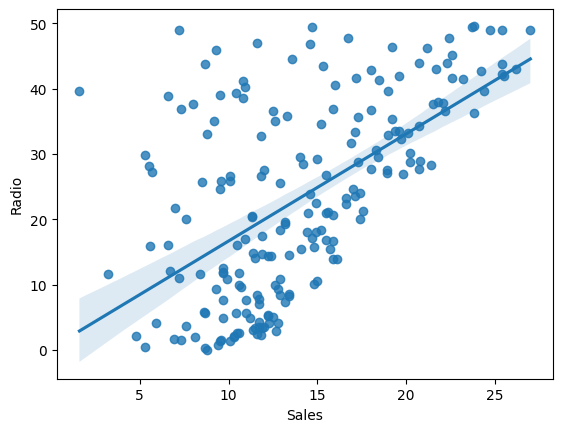

In [76]:
sns.regplot(data=ad,x="Sales",y="Radio")

C:\Users\Intel\AppData\Roaming\Python\Python39\site-packages\seaborn\categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


<AxesSubplot:>

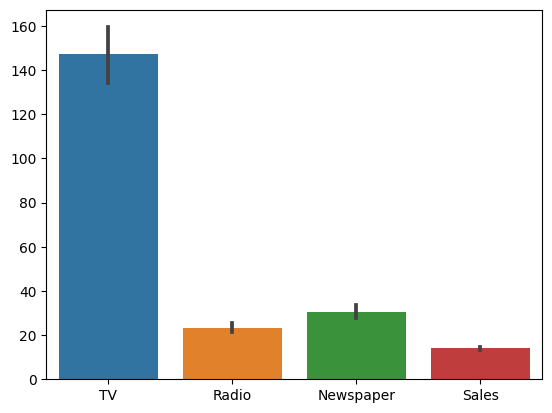

In [99]:
sns.barplot(ad)

In [77]:
x=ad.drop('Sales',axis=1)
y=ad['Sales']

In [78]:
polynomial_converter=PolynomialFeatures(degree=3,include_bias=False)

In [79]:
polyfeatures=polynomial_converter.fit_transform(x)

In [80]:
polyfeatures.shape

(200, 19)

In [81]:
x.iloc[0]

TV           230.1
Radio         37.8
Newspaper     69.2
Name: 0, dtype: float64

In [82]:
x_train,x_test,y_train,y_test = train_test_split(polyfeatures,y,test_size=0.3,random_state=101)

In [83]:
model=LinearRegression()

In [84]:
model.fit(x_train,y_train)

LinearRegression()

In [85]:
test_prediction = model.predict(x_test)

<AxesSubplot:xlabel='Sales'>

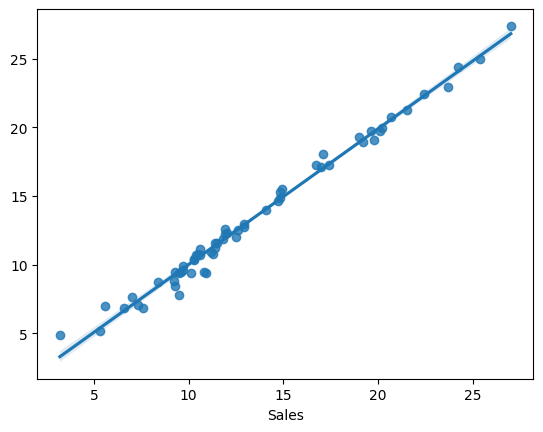

In [96]:
sns.regplot(x=y_test,y=test_prediction)